# Linear Regression from Scratch!

---




### Let's first create our loss function
![alt text](https://miro.medium.com/max/868/1*1g7XNjpxE92xo-jKxS4uow.png)

In [13]:
def cost_function(m, b, x, y):
  totalError = 0
  for i in range(0, len(x)):
    totalError += (y[i] - (m*x[i]+b))**2
    return totalError/float(len (x))

In [14]:
def gradient_descent(b, m, x, y, learning_rate, num_iterations):
    N = float(len(x))
    for j in range(num_iterations):
        b_gradient = 0
        m_gradient = 0
        for i in range(0, len(x)):
            b_gradient += -(2/N) * (y[i] - ((m * x[i]) + b))
            m_gradient += -(2/N) * x[i] * (y[i] - ((m * x[i]) + b))
        b -= (learning_rate * b_gradient)
        m -= (learning_rate * m_gradient)
        if j%100==0:
            print("MSE after " + str(j) + " iterations: " + str(cost_function(m, b, x, y)))
    return [b, m]

### Let's test our Linear Regression algorithm on some test data


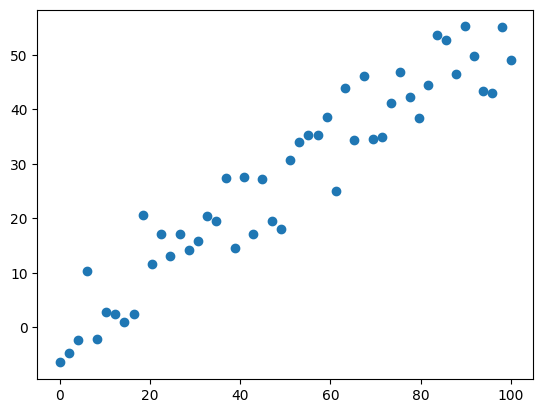

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 100, 50)
delta = np.random.uniform(-10, 10, x.size)
y = 0.5*x + 3 + delta
plt.scatter(x, y)

In [16]:
learning_rate = 0.0001
initial_b = 0
initial_m = 0
num_iterations = 1000
print('Initial MSE:', cost_function(initial_m, initial_b, x, y))
[b, m] = gradient_descent(initial_b, initial_m, x, y, learning_rate, num_iterations)
print('b:', b)
print('m:', m)
print('MSE:', cost_function(m, b, x, y))

Initial MSE: 0.8323272114234515
MSE after 0 iterations: 0.8337296447474071
MSE after 100 iterations: 0.8329944404366129
MSE after 200 iterations: 0.8315809008617943
MSE after 300 iterations: 0.8301758141517189
MSE after 400 iterations: 0.8287791246748616
MSE after 500 iterations: 0.8273907772105895
MSE after 600 iterations: 0.8260107169457691
MSE after 700 iterations: 0.8246388894714035
MSE after 800 iterations: 0.823275240779301
MSE after 900 iterations: 0.821919717258772
b: -0.045663768193153466
m: 0.549416340197565
MSE: 0.8205857004266092


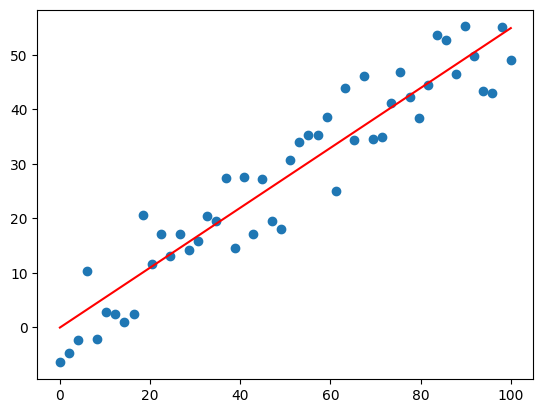

In [17]:
predictions = [(m * x[i]) + b for i in range(len (x))]
plt.scatter(x, y)
plt.plot(x, predictions, color='r')

# Let's use Sk Learn's Linear Regression model

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
print(x.shape)
x = x.reshape((-1, 1))
print(x.shape)

(50,)
(50, 1)


In [19]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [20]:
print('Y Intercept:', model.intercept_)
print('Gradient:', model.coef_)

Y Intercept: -1.0637501472396025
Gradient: [0.56453454]


In [21]:
print('Y intercept:', b)
print('Gradient:', m)

Y intercept: -0.045663768193153466
Gradient: 0.549416340197565


In [22]:
y_pred = model.predict(x)

In [23]:
y

array([-6.45107437, -4.76626923, -2.2970125 , 10.24392109, -2.19293284,
        2.84640227,  2.50797517,  0.98690503,  2.3625734 , 20.6517209 ,
       11.67457839, 17.09394064, 13.14223921, 17.13039577, 14.173635  ,
       15.89915198, 20.4010942 , 19.49091969, 27.33682835, 14.45963497,
       27.5393016 , 17.05208362, 27.17495073, 19.57725336, 17.9526231 ,
       30.61921285, 34.01274484, 35.35900542, 35.24652079, 38.62407276,
       24.98023367, 43.86295655, 34.28415645, 46.16112381, 34.49376589,
       34.96550087, 41.17708449, 46.91051394, 42.16703428, 38.45629763,
       44.43217391, 53.70966366, 52.77889281, 46.39049803, 55.19182699,
       49.8629087 , 43.41634165, 42.96088768, 55.04447286, 49.05010394])

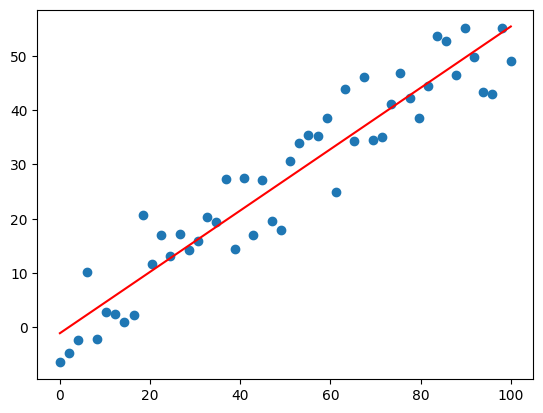

In [24]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

In [25]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

Mean squared error: 30.05


# Linear Regression on Olympic 100m Gold Times

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQTrYpw1FCRAqMEsZJRBr30sotdaZvia4NgQAWiJEuK13DAgnsZ)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/olympic100m.csv"
df = pd.read_csv(file_name)
df.head(40)

,year,time
0,1896,12.00
1,1900,11.00
2,1904,11.00
3,1906,11.20
4,1908,10.80
5,1912,10.80
6,1920,10.80
7,1924,10.60
8,1928,10.80
9,1932,10.30


In [27]:
x = df['year']
x_train = np.array(x).reshape(-1, 1)
x_train.shape

(29, 1)

In [28]:
y_train = np.array(df['time'])

In [30]:
y_train.shape

(29,)

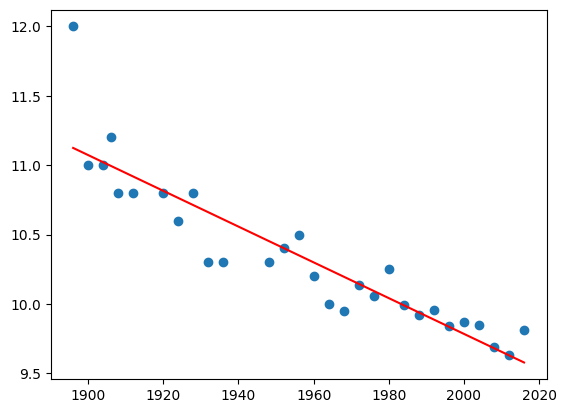

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train)
plt.plot(x, y_pred, color = 'r')

In [32]:
x_2020 = np.array([2020]).reshape(-1, 1)
x_2020.shape

(1, 1)

In [33]:
model.predict(x_2020)

array([9.52679525])

# Polynomial Regressions

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/polylinearregression.csv"
df = pd.read_csv(file_name)
df.head(7)

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [35]:
x = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [36]:
x

array([[  0],
       [ 20],
       [ 40],
       [ 60],
       [ 80],
       [100]])

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9)
model_Poly = poly.fit_transform(x)
lin_poly = LinearRegression()
lin_poly.fit(model_Poly, y)

LinearRegression()

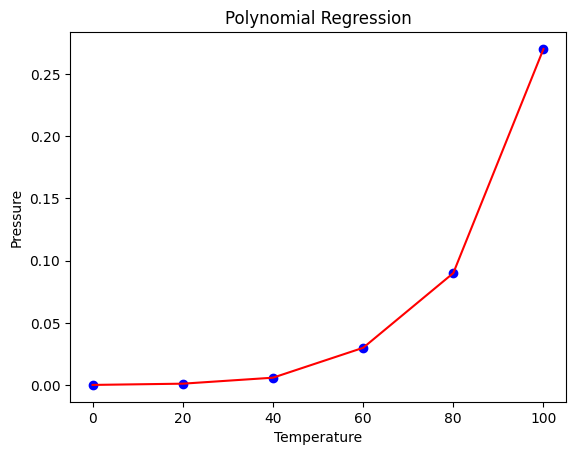

In [38]:
plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_poly.predict(model_Poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

# Multivariate Linear Regression

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
auto_df = pd.read_csv(file_name)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [41]:
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [42]:
indexNames = auto_df[auto_df['horsepower'] == '?'].index
auto_df.drop(indexNames, inplace = True)

In [43]:
auto_df[auto_df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [44]:
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [45]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [46]:
x = auto_df.iloc[:, 1:8].values
y = auto_df.iloc[:, 0].values

In [47]:
x.shape

(392, 7)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [50]:
Trial_Data = np.array([8, 220, 195, 3042, 6.7, 98, 3])
Trial_Data = Trial_Data.reshape((-1, 7))
Trial_Data = Trial_Data.astype(float)

In [51]:
regressor.predict(Trial_Data)[0]

37.86321409762152